In [22]:
import pandas as pd
import networkx as nx

df = pd.read_csv("defined_articles.csv")

In [23]:
#creating a bipartite network for organisms and compounds

#read data from file and crate datastructures in lists
compound_nodes = []
organism_nodes = []
edges = []

#iterate over the rows of the dataframe
for index, row in df.iterrows():

    #get lists of substrates, products, and organisms
    substrates = row["Substrate"].split(", ")
    products = row["Product"].split(", ")
    organisms = row["Organisms"].split(", ")

    for substrate in substrates:
        compound_nodes.append(substrate)

        for organism in organisms:
            organism_nodes.append(organism)
            #add edge from the substrate to the organism
            edges.append((substrate, organism))
            
            for product in products:
                compound_nodes.append(product)
                #add edge from the organism to the product
                edges.append((organism, product))

#build network
bipartiteNetwork = nx.DiGraph()

for node in compound_nodes:
    s = 5 + compound_nodes.count(node)
    bipartiteNetwork.add_node(node, bipartite = 0, color = "red", size = s)

for node in organism_nodes:
    s = 5 + organism_nodes.count(node)
    bipartiteNetwork.add_node(node, bipartite = 1, shape = 'square', size = s)

bipartiteNetwork.add_edges_from(edges)

#visualise network

from pyvis.network import Network

nt = Network('1000px', '1800px', directed=True)
nt.from_nx(bipartiteNetwork)
nt.show('plots/bipartite_organisms_comounds.html')

In [27]:
#creating a bipartite network for organisms(using genus!!) and compounds

#read data from file and crate datastructures in lists
compound_nodes = []
organism_nodes = []
edges = []

#iterate over the rows of the dataframe
for index, row in df.iterrows():

    #get lists of substrates, products, and organisms
    substrates = row["Substrate"].split(", ")
    products = row["Product"].split(", ")
    organisms = row["Organisms"].split(", ")
    
    #taking the first word to get the genus instead of the organisms
    genuses = [organism.split(' ')[0] for organism in organisms]

    for substrate in substrates:
        compound_nodes.append(substrate)

        for genus in genuses:
            organism_nodes.append(genus)
            #add edge from the substrate to the organism
            edges.append((substrate, genus))
            
            for product in products:
                compound_nodes.append(product)
                #add edge from the organism to the product
                edges.append((genus, product))

#build network
bipartiteNetwork_genus = nx.DiGraph()

for node in compound_nodes:
    s = 5 + compound_nodes.count(node)
    bipartiteNetwork_genus.add_node(node, bipartite = 0, color = "red", size = s)

for node in organism_nodes:
    s = 5 + organism_nodes.count(node)
    bipartiteNetwork_genus.add_node(node, bipartite = 1, shape = 'square', size = s)

bipartiteNetwork_genus.add_edges_from(edges)

#visualise network

from pyvis.network import Network

nt = Network('1000px', '1800px', directed=True)
nt.from_nx(bipartiteNetwork_genus)
nt.show('plots/bipartite_genus_organisms_comounds.html')

In [24]:
#co-occurrence graph for organisms

#imports
import itertools as it
from collections import Counter

#read data from file and crate datastructures in lists
nodes = []
edges = []

#iterate over the rows of the dataframe
for index, row in df.iterrows():

    #get lists of organisms
    organisms = row["Organisms"].split(", ")

    #get a list of each edge
    co_occurrences = list(it.combinations(organisms, 2))

    #add all the organisms the the node list
    nodes.extend(organisms)

    #add all the egdes to the global edge list
    edges.extend(co_occurrences)

    #add a self-loop if there is only a single organism listed
    if len(organisms) == 1:
        edges.append((organisms[0], organisms[0]))


#build network
coOccurrenceNetwork = nx.Graph()

#add nodes w/ size
for node in nodes:
    s = 5 + nodes.count(node)
    coOccurrenceNetwork.add_node(node, size = s)

#add edges w/weights
edge_counts = Counter(edges)
for e in edge_counts:
    u = e[0]
    v = e[1]
    c = edge_counts[e]
    coOccurrenceNetwork.add_edge(u, v, weight = c)

#visualise network

from pyvis.network import Network

nt = Network('1000px', '1800px') #, select_menu=True)
nt.from_nx(coOccurrenceNetwork)
nt.show('plots/co_occurrence_network.html')

In [25]:
#co-occurrence graph for organisms
#modified for genus

#imports
import itertools as it
from collections import Counter

#read data from file and crate datastructures in lists
nodes = []
edges = []

#iterate over the rows of the dataframe
for index, row in df.iterrows():

    #get lists of organisms
    organisms = row["Organisms"].split(", ")

    #taking the first word to get the genus instead of the organisms
    genuses = [organism.split(' ')[0] for organism in organisms]

    #get a list of each edge
    #co_occurrences = list(it.combinations(organisms, 2))
    co_occurrences = list(it.combinations(genuses, 2))

    #add all the organisms the the node list
    #nodes.extend(organisms)
    nodes.extend(genuses)

    #add all the egdes to the global edge list
    edges.extend(co_occurrences)

    #add a self-loop if there is only a single organism listed
    #if len(organisms) == 1:
    #    edges.append((organisms[0], organisms[0]))
    
    #add a self-loop if there is only a single organism listed
    if len(genuses) == 1:
        edges.append((genuses[0], genuses[0]))


#build network
coOccurrenceNetwork = nx.Graph()

#add nodes w/ size
for node in nodes:
    s = 5 + nodes.count(node)
    coOccurrenceNetwork.add_node(node, size = s)

#add edges w/weights
edge_counts = Counter(edges)
for e in edge_counts:
    u = e[0]
    v = e[1]
    c = edge_counts[e]
    coOccurrenceNetwork.add_edge(u, v, weight = c)

#visualise network

from pyvis.network import Network

nt = Network('1000px', '1800px') #, select_menu=True)
nt.from_nx(coOccurrenceNetwork)
#nt.show('plots/co_occurrence_network.html')
nt.show('co_occurrence_genus_network.html')

In [28]:
#3-core network

three_core_bipartite = nx.k_core(bipartiteNetwork_genus, 3)

nt = Network('1000px', '1800px', directed=True)
nt.from_nx(three_core_bipartite)
nt.show('plots/bipartite-3-core.html')

Network properties:

In [11]:
#functions for degree distributions

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')

def make_degree_dist_histogram(G, title):
    degree_freq = nx.degree_histogram(G)   # list of the frequency of each degree value (by index)
    degrees = range(len(degree_freq))
    plt.bar(degrees, degree_freq)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

def make_loglog_degree_dist_histogram(G, title):
    degree_freq = nx.degree_histogram(G)
    degrees = range(len(degree_freq))
    plt.loglog(degrees, degree_freq) 
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

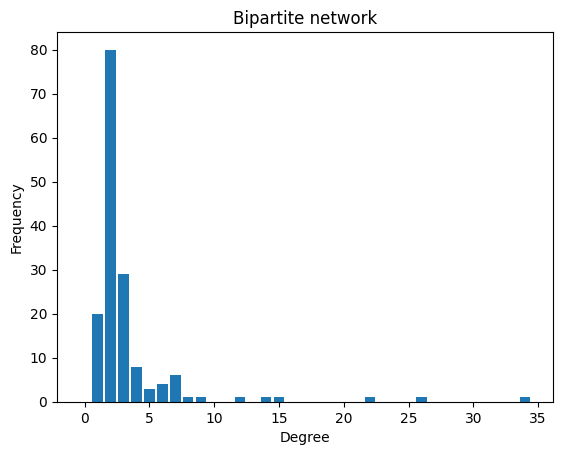

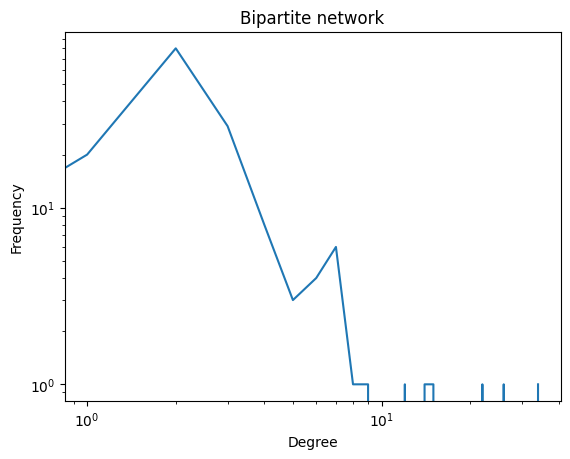

In [12]:
make_degree_dist_histogram(bipartiteNetwork, "Bipartite network")
make_loglog_degree_dist_histogram(bipartiteNetwork, "Bipartite network")

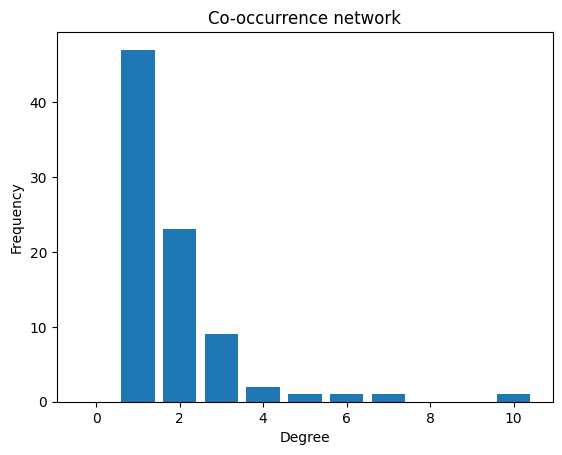

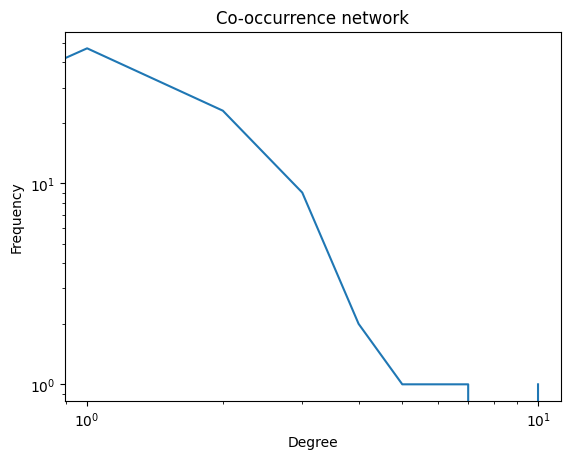

In [14]:
make_degree_dist_histogram(coOccurrenceNetwork, "Co-occurrence network")
make_loglog_degree_dist_histogram(coOccurrenceNetwork, "Co-occurrence network")